### Introduction to Pandas

### What is Pandas?

Pandas is a fast, powerful, flexible and easy-to-use open source data analysis and manipulation tool built on top of the Python programming language.

It is also one of the most popular libraries used by data experts from all around the world.

### What can you do with Pandas?

Pandas is used for data wrangling, data analysis and data visualisation.

Some examples include creating and merging dataframes, dropping unwanted columns and rows, locating and filling null values, grouping data by category, creating basic plots like barplot, scatter plot, histogram etc.

### Why should you learn to use Pandas?

As humans interact more and more with technology, vast amounts of data are being generated each day. Hence, the ability to analyse these data and draw insights from them is becoming an increasingly important skill to have in the modern workforce. Organisations are progressively turning to data to help them better understand their customers and products, analyse past trends and patterns, improve operational efficiency and so on.

Here are just some of the many reasons why you should learn pandas:

- By learning pandas, you learn the fundamental ideas behind working with data as well as some skill and knowledge to code in Python
- It is straightforward to learn and you can immediately apply it to any dataset you want
- It is commonly used in the data science and machine learning community

## Module 1

### Reading CSV files & Creating your own dataframe

To use pandas, we have to first import the Pandas library and the way you do that is as follows

In [1]:
import pandas as pd

### Reading CSV files

For this part of the tutorial, you will need to download the titanic dataset on kaggle. Once you have downloaded the file, unzip the file i.e. extract its content out of the file. Keep in mind where the file is on your compute because as we need to specify the location of the file in Jupyter notebook in order to load the data.

Read data via `pd.read_csv`

In [2]:
train = pd.read_csv('/home/nicolaedrabcinski/research/utm_course/data/train.csv')
test = pd.read_csv('/home/nicolaedrabcinski/research/utm_course/data/test.csv')

Let's have a look at our datasets

`head` shows the first five rows of the dataframe by default but you can specify the number of rows in parenthesis

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


`tail` shows the bottom five rows by default

In [4]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


`shape` function tells us how many rows and columns exist in a dataframe

In [5]:
train.shape

(891, 12)

### Creating your own dataframe

Number entries

In [6]:
test_scores = pd.DataFrame({
    "Student_ID": [154, 973, 645],
    "Science": [50, 75, 31],
    "Geography": [88, 100, 66],
    "Math": [72, 86, 94]
})

test_scores

,Student_ID,Science,Geography,Math
0,154,50,88,72
1,973,75,100,86
2,645,31,66,94


Text entries

In [7]:
survey = pd.DataFrame({
    'James': ['I liked it', 'It could use a bit more salt'],
    'Emily': ['It is too sweet', 'Yum!']
})

survey

,James,Emily
0,I liked it,It is too sweet
1,It could use a bit more salt,Yum!


### Index

We can either set an existing column as our index or specify an index when creating a dataframe

Let's begin by setting an existing column as index

In [8]:
test_scores = test_scores.set_index('Student_ID')
test_scores

,Science,Geography,Math
Student_ID,,,
154,50,88,72
973,75,100,86
645,31,66,94


Alternatively, we can specify an index column when creating a dataframe via the `index` argument

In [9]:
survey = pd.DataFrame({'James': ['I liked it', 'It could use a bit more salt'], 'Emily': ['It is too sweet', 'Yum!']},
                     index = ['Product A', 'Product B'])
survey

,James,Emily
Product A,I liked it,It is too sweet
Product B,It could use a bit more salt,Yum!


You can also reset the index back to its default

Try playing around with `drop` and `inplace` and see what they do

In [10]:
survey.reset_index(drop = True, inplace = True)
survey

,James,Emily
0,I liked it,It is too sweet
1,It could use a bit more salt,Yum!


### Renaming columns

Suppose we want to change the names of the first two columns

In [11]:
test_scores.rename(columns = {'Geography': 'Physics', 'Science': 'Arts'}, inplace = True)
test_scores

,Arts,Physics,Math
Student_ID,,,
154,50,88,72
973,75,100,86
645,31,66,94


### Droping columns and rows

The are a few of ways you can drop columns or rows from your dataframe. In this example, I am only focusing on the `drop` function.

In [12]:
test_scores.drop(columns = 'Math')

,Arts,Physics
Student_ID,,
154,50,88
973,75,100
645,31,66


We can make this more robust once we learn the `loc` function

In [13]:
test_scores.drop(973)

,Arts,Physics,Math
Student_ID,,,
154,50,88,72
645,31,66,94


### Adding columns and rows

In [14]:
test_scores

,Arts,Physics,Math
Student_ID,,,
154,50,88,72
973,75,100,86
645,31,66,94


Create a new column for history subject

In [15]:
test_scores['History'] = [79, 70, 67]
test_scores

,Arts,Physics,Math,History
Student_ID,,,,
154,50,88,72,79
973,75,100,86,70
645,31,66,94,67


Add more product reviews from James and Emily

In [16]:
survey

,James,Emily
0,I liked it,It is too sweet
1,It could use a bit more salt,Yum!


Create two more rows

In [17]:
df = pd.DataFrame({'James': ['Not good', 'Meh'], 'Emily': ['My grandma can cook better', 'Pretty average']})
df

,James,Emily
0,Not good,My grandma can cook better
1,Meh,Pretty average


Use the `concat` function

In [18]:
survey = pd.concat([survey, df], ignore_index=True)
survey

,James,Emily
0,I liked it,It is too sweet
1,It could use a bit more salt,Yum!
2,Not good,My grandma can cook better
3,Meh,Pretty average


### Series

There are two core objects in pandas, one is dataframe which we have already gone through, the other is called a series.  
Dataframe, as we have seen, looks like a data table. A series on the other hand is a sequence of data values or sometimes called a list.

In [19]:
pd.Series([1, 2, 3, 4, 5])

0    1
1    2
2    3
3    4
4    5
dtype: int64

You can think of series as being a single column within a dataframe and so we can assign a index label to a series just like how we would with a dataframe.

In [20]:
profit = pd.Series([75, 80, 66], index = ['2018 Profit', '2019 Profit', '2020 Profit'])
profit

2018 Profit    75
2019 Profit    80
2020 Profit    66
dtype: int64

Using this same logic, we can form a dataframe using a list of list i.e. a combination of series. Let's see how we can do that.

In [21]:
customer_sales = pd.DataFrame([[317, 'Melbourne', '80'], [887, 'New York', '91'], [225, 'London', '50']], columns = ['Customer_ID', 'City', 'Sales'])
customer_sales

,Customer_ID,City,Sales
0,317,Melbourne,80
1,887,New York,91
2,225,London,50


Unlike before when we were creating our dataframe by column, when creating a dataframe using a series, a single list corresponds to a single row in the dataframe.

## Module 2

Later we looked at how we can import an external dataset into our Jupyter notebook or create our own dataframe from scratch using pandas.

At the current moment, we are going to look at how we can select a subset of our dataframe whether that is an entire row, column or a specific cell. We will learn how to use the loc and iloc function to accomplish this task.

We will use the titanic dataset from Kaggle for this tutorial.

### Import Pandas

We already have done this but let's do it one more time

In [22]:
import pandas as pd

### Import data

In [23]:
train = pd.read_csv('/home/nicolaedrabcinski/research/utm_course/data/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Selecting a series/column in a dataframe

There are two ways you can select a column of a dataframe

- train.Name
- train['Name']

What is the difference between the two? Well, they both do the exact same thing except the second one is more robust. Here is an example, say I rename the `PassengerId` column to `Passenger ID`, `train.Passenger ID` would not work.

Let's see it in action.

In [24]:
train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [25]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

So both ways are able to give us the Name column without any issues

In [26]:
train.rename(columns = {'PassengerId': 'Passenger ID'}, inplace=True)
train.head()

,Passenger ID,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Passenger ID columns has now been renamed

In [27]:
train['Passenger ID']

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: Passenger ID, Length: 891, dtype: int64

Personally, I like to use method 2 because it can handle all cases but if for some reason you prefer to use method 1 just bear in mind that it has this limitation.

### Index-based selection

We use iloc to select data based on their numerical position in the dataframe.  
`iloc` takes two argument, first is row followed by column. It has a starting index of 0 that is 0 is first, 1 is second, 2 is third and so on.

In [28]:
train.iloc[0, :]

Passenger ID                          1
Survived                              0
Pclass                                3
Name            Braund, Mr. Owen Harris
Sex                                male
Age                                22.0
SibSp                                 1
Parch                                 0
Ticket                        A/5 21171
Fare                               7.25
Cabin                               NaN
Embarked                              S
Name: 0, dtype: object

Let's take a look at the fourth column that is the Name column and all rows

In [29]:
train.iloc[:, 3]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

`iloc` includes the first number but exclude the last number of the range. For example, if we want the second and third row of the first column, the code is as follows:

In [30]:
train.iloc[1:3, 0]

1    2
2    3
Name: Passenger ID, dtype: int64

We can also pass in a list or series into `iloc`

In [31]:
train.iloc[[0, 1, 2], :]

,Passenger ID,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


We can also go from the bottom of the dataframe

In [32]:
train.iloc[-5:, :]

,Passenger ID,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


This is the same as using `tail` function

In [33]:
train.tail()

,Passenger ID,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Label-based selection

With loc we need to specify the actual name of the column

In [34]:
train.loc[0, 'Name']

'Braund, Mr. Owen Harris'

Different to `iloc`, when we want to select a range of values, `loc` includes both the start as well as the end of the range.

For example, to get the first 5 rows under iloc we would have `train[:5]` whereas for loc we have `train[:4]` instead.

In [35]:
train.loc[:4, ['Name', 'Sex', 'Age']]

,Name,Sex,Age
0,"Braund, Mr. Owen Harris",male,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,"Heikkinen, Miss. Laina",female,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,"Allen, Mr. William Henry",male,35.0


### Conditional Selection

We can select rows that satisfy certain conditions. In this section, we will look at how that works

Rows with age 50

In [36]:
train.loc[train['Age'] == 50, :]

,Passenger ID,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",female,50.0,0,1,230433,26.0000,NaN,S
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
434,435,0,1,"Silvey, Mr. William Baird",male,50.0,1,0,13507,55.9000,E44,S
458,459,1,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.5000,NaN,S
482,483,0,3,"Rouse, Mr. Richard Henry",male,50.0,0,0,A/5 3594,8.0500,NaN,S
526,527,1,2,"Ridsdale, Miss. Lucy",female,50.0,0,0,W./C. 14258,10.5000,NaN,S
544,545,0,1,"Douglas, Mr. Walter Donald",male,50.0,1,0,PC 17761,106.4250,C86,C
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S
723,724,0,2,"Hodges, Mr. Henry Price",male,50.0,0,0,250643,13.0000,NaN,S


Rows with age 50 AND are female

In [37]:
train.loc[(train['Age'] == 50) & (train['Sex'] == 'female') ,:]

,Passenger ID,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",female,50.0,0,1,230433,26.0000,NaN,S
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
458,459,1,2,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.5000,NaN,S
526,527,1,2,"Ridsdale, Miss. Lucy",female,50.0,0,0,W./C. 14258,10.5000,NaN,S


Rows with age 50 OR have fare greater than or equal to 200

In [38]:
train.loc[(train['Age'] == 50) | (train['Fare'] >= 200), :]

,Passenger ID,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",female,50.0,0,1,230433,26.0000,NaN,S
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


All the rows with null cabin columns

In [39]:
train.loc[train['Cabin'].isnull(), :]

,Passenger ID,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


The exact opposite to the isnull function is the notnull function which returns series without any null values

All rows with C or Q in Embarked column

In [40]:
train.loc[train['Embarked'].isin(['C', 'Q']), :]

,Passenger ID,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


This is the same as if we had used the or statement

In [41]:
train.loc[(train['Embarked'] == 'C') | (train['Embarked'] == 'Q'), :]

,Passenger ID,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Module 3

### Functions and descriptive statistics

Later we learned how to select row, column and element from a dataframe. In this tutorial, we will explore some common summary functions which will allow us to quickly draw insights about the different features in a dataframe.

Similar to last module, we will be working with the titanic dataset on Kaggle.

### Summary functions

Summary functions like describe and info give a high-level summary of our data.

Let's see how they work.

Describe function on numerical variable

In [42]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

`Describe` function on text variable

In [43]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

`Info` function

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Passenger ID  891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           714 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Unique and value counts functions

How many unique Embarked values are there?

In [45]:
train['Embarked'].nunique()

3

What are the unique Embarked values?

In [46]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

What are the counts of those individual values?

In [47]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

### Descriptive statistics

What is the oldest age?

In [48]:
train['Age'].max()

80.0

Who is that passenger?

In [49]:
train.loc[train['Age'] == 0.42, :]

,Passenger ID,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


What is the average age?

In [50]:
train['Age'].mean()

29.69911764705882

What is median fare?

In [51]:
train['Fare'].median()

14.4542

What is the most frequent Embarked value?  
We can cross check this with the value counts functions above and this should return `S` as the answer

In [52]:
train['Embarked'].mode()

0    S
Name: Embarked, dtype: object

### Map and apply function

Both map and apply help us transform our data. Map is a series method that is it only works with a single column whereas apply works with both a single column as well as an entire dataframe.

All the methods for descriptive statistics in the section above such as max, min and mean are all examples of functions that have already been built into Pandas so that we don't have write the functions ourselves. But what if we have come up with our own unique transformation that we would like to implement to our dataframe? This is where map and apple comes in.

So what's the game plan?
1. First, we have to write our our desired function
2. Then, we need to apply that function over a series in our dataframe (via map) or over the entire dataframe (via apply)

In Python, there are two ways to write functions that you should know of. First via `def` and second is via something called a `lambda` function which is a slightly quicked and easier way, I will teach you both these methods.

Say we want to write a function which computes the cube of a number

In [53]:
def cube(input):
    output = input ** 3
    return output

cube(2)

8

Second method: `lambda` function

In [54]:
cube = lambda input: input **3
cube(3)

27

Let's move on applying function to our dataframe.

Suppose we would like to extract the last name out the `Name` column of our dataset. This requires a little function called `split`.

Define our function.

In [55]:
def extract_last_name(name):
    token = name.split(',')
    return token[0]

Map the function to the `Name` columns and assign a new column in our dataframe called `Last Name`

In [56]:
train['Last Name'] = train['Name'].apply(extract_last_name)

Let's have a look at the first 5 rows

In [57]:
train.loc[:4, ['Name', 'Last Name']]

,Name,Last Name
0,"Braund, Mr. Owen Harris",Braund
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Cumings
2,"Heikkinen, Miss. Laina",Heikkinen
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Futrelle
4,"Allen, Mr. William Henry",Allen


### Bonus tip

You can also use the `map` function to encode categorical variables. This is particularly useful and important when you are preparing your dataset for machine learning. Most machine learning algorithms cannot learn from non-numeric inputs therefore, we have to first turn our categorical variables into numbers before fitting the model to our data.

Examples of categorical variables in our titanic dataset are the `PClass`, `Sex`, `Embarked` columns.

Don't worry if you do not understand any machine learning, this section is merely to illustrate how you can encode using the map function.

Suppose we want to encode the `Sex` column such that `male` gets assigned as `1` and `female` gets assigned as `0`. 

In [58]:
train['Encoded Sex'] = train['Sex'].map({'male': 1, 'female': 0})

In [59]:
train.loc[:4, ['Sex', 'Encoded Sex']]

,Sex,Encoded Sex
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


An alternative way to accomplish this is via a Pandas function called `get_dummies`

In [60]:
pd.get_dummies(train['Sex'])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


## Module 4

### Grouping & Sorting

We learned how to apply function to a series within a dataframe. However, sometimes we might only want to consider a particular subset of group of a specifig column. This is where groupind and sorting comes in.

Segmentation is a really powerful way to extract insights about a particular group within our dataset e.g customer age groups, geographic location, types of products etc. It allows us to break down a big piece of data into smaller, more manageable components. That way we can more easily analyse and identify the key features and patterns about particular segment.

We are going to look at some of the techniques that you can use to group and sort your data that will take your data analysis to the next level.

To demonstrate these techniques, we are gound to look at some of the techniques that you can use to group and sort your data that will take your data analysis to the next level.

To demonstrate these techniques, we are going to use the US gun violence data which you can find [here](https://www.kaggle.com/datasets/jameslko/gun-violence-data). The data records the gun violence incidents in the US between January 2013 and March 2018 inclusive.

### Importing data

In [61]:
data = pd.read_csv('/home/nicolaedrabcinski/research/utm_course/data/gun-violence-data.csv')
data.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


### Data preparation

For the purpose of keeping this notebook simple, I am going to drop the all columns to the `n_injured`

In [62]:
data = data.iloc[:, :7]
data.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2


I am also going to drop `incident_id`, `city_or_country` and `address` column

In [63]:
data.drop(columns = ['incident_id', 'city_or_county', 'address'], inplace=True)
data.head()

,date,state,n_killed,n_injured
0,2013-01-01,Pennsylvania,0,4
1,2013-01-01,California,1,3
2,2013-01-01,Ohio,1,3
3,2013-01-05,Colorado,4,0
4,2013-01-07,North Carolina,2,2


Now, create some additional features.
Let's import library for datatime

In [64]:
from datetime import datetime

data['date'] = pd.to_datetime(data['date']) # Convert date to datetime format
data['year'] = data['date'].dt.year # Extract year
data['month'] = data['date'].dt.month # Extract month
data['day'] = data['date'].dt.day # Extract day
data['day_of_week'] = data['date'].dt.dayofweek # Extract day of week
data['total_victim'] = data['n_killed'] + data['n_injured'] # Sum up number of death and injuries

data.head()

,date,state,n_killed,n_injured,year,month,day,day_of_week,total_victim
0,2013-01-01,Pennsylvania,0,4,2013,1,1,1,4
1,2013-01-01,California,1,3,2013,1,1,1,4
2,2013-01-01,Ohio,1,3,2013,1,1,1,4
3,2013-01-05,Colorado,4,0,2013,1,5,5,4
4,2013-01-07,North Carolina,2,2,2013,1,7,0,4


Replace numeric day of week values with text

In [65]:
data['day_of_week'] = data['day_of_week'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
data.head()

,date,state,n_killed,n_injured,year,month,day,day_of_week,total_victim
0,2013-01-01,Pennsylvania,0,4,2013,1,1,Tuesday,4
1,2013-01-01,California,1,3,2013,1,1,Tuesday,4
2,2013-01-01,Ohio,1,3,2013,1,1,Tuesday,4
3,2013-01-05,Colorado,4,0,2013,1,5,Saturday,4
4,2013-01-07,North Carolina,2,2,2013,1,7,Monday,4


Check for null values

In [66]:
data.isnull().sum()

date            0
state           0
n_killed        0
n_injured       0
year            0
month           0
day             0
day_of_week     0
total_victim    0
dtype: int64

Our dataset is ready

### Groupwise analysis

To group data using Pandas, we the `groupby` operation

Recall `value_counts` function that we covered earlier. We can replicate what that function does using `groupby` function.

Suppose we want to count the number of cases for each day of the week.

In [67]:
data['day_of_week'].value_counts()

day_of_week
Sunday       13283
Saturday     13022
Wednesday    12456
Friday       12223
Monday       12221
Thursday     12012
Tuesday      11872
Name: count, dtype: int64

We can also accomplish this via the `groupby` function

For count it wouldn't matter much which column we apply the function to because we are only counting the number of rows.

I have used the `total_victim` column here

The order is different here because in `value_counts` it is sorted from highest to lowest but the numbers should be identical

In [68]:
data.groupby('day_of_week')['total_victim'].count()

day_of_week
Friday       12223
Monday       12221
Saturday     13022
Sunday       13283
Thursday     12012
Tuesday      11872
Wednesday    12456
Name: total_victim, dtype: int64

There are other functions other than count that you can apply to a group. We have covered them in our tutorial last week, for example, `sum`, `min`, `max`, `mean` etc.

What are the total number of victims from gun violence for each US state?

We first group the number of victims by state then sum them all up

In [69]:
data.groupby('state')['total_victim'].sum()

state
Alabama                 1530
Alaska                   188
Arizona                  729
Arkansas                 662
California              4932
Colorado                 579
Connecticut              571
Delaware                 417
District of Columbia     746
Florida                 3984
Georgia                 2436
Hawaii                    45
Idaho                    111
Illinois                5287
Indiana                 1636
Iowa                     381
Kansas                   490
Kentucky                 955
Louisiana               2363
Maine                     89
Maryland                1710
Massachusetts            763
Michigan                1734
Minnesota                453
Mississippi              889
Missouri                2067
Montana                  114
Nebraska                 353
Nevada                   548
New Hampshire             98
New Jersey              1419
New Mexico               371
New York                2746
North Carolina          2415
North Da

Suppose we would like to compute a bunch of different functions to group simultaneously. The way we do that is via the `agg` function.

Let's work out the average, minimum and maximum number of victims for each month.

For mean we have to first import `NumPy`

In [70]:
import numpy as np

In [71]:
data.groupby('month')['total_victim'].agg(['mean', 'min', 'max'])

,mean,min,max
month,,,
1,0.714561,0,8
2,0.709651,0,12
3,0.729943,0,13
4,0.714047,0,20
5,0.764901,0,27
6,0.756369,0,12
7,0.744409,0,12
8,0.715486,0,12
9,0.633661,0,15


### Sorting

We can sort a series in ascending or descending order via the `sort_values` function

Total number of victims in each state from highest to lowest

In [72]:
data.groupby('state')['total_victim'].sum().sort_values(ascending=False)

state
Illinois                5287
California              4932
Florida                 3984
Texas                   3979
Pennsylvania            2854
Ohio                    2811
New York                2746
Georgia                 2436
North Carolina          2415
Louisiana               2363
Tennessee               2158
Missouri                2067
South Carolina          1737
Michigan                1734
Maryland                1710
Indiana                 1636
Virginia                1574
Alabama                 1530
New Jersey              1419
Wisconsin               1140
Kentucky                 955
Mississippi              889
Oklahoma                 844
Washington               770
Massachusetts            763
District of Columbia     746
Arizona                  729
Arkansas                 662
Colorado                 579
Connecticut              571
Nevada                   548
Kansas                   490
Minnesota                453
Delaware                 417
Oregon  

We can see that Illinois has the most number of victims from gun violence

Number of gun violence cases in each month from lowest to highest

In [73]:
data.groupby('month')['total_victim'].count().sort_values(ascending=True)

month
11     3818
12     3876
10     4937
9      5080
2      6165
3      8002
1      8317
4      8379
6      9067
5      9362
8      9757
7     10329
Name: total_victim, dtype: int64

November had the leasst numbr of cases while Januare had the most

## Module 5

### Data types and missing values

In this chapter we will go over some common data types that you will see in Pandas as well learn how to deal with missing values.

We will be using the house price dataset which you can find [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

We aim to investigate how the different features of a house affect its final sale price. Each row of the dataset represents a single house and its many characteristics. The target (response) variable is the sale price.

### Loading data

In [74]:
data = pd.read_csv("/home/nicolaedrabcinski/research/utm_course/data/house_prices.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Data types

We can use Pandas function `dtypes` to grab the data type of every column in a data frame.

In [75]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

Alternatively, if we only want to consider a particular column, we can do this.

In [76]:
data['SalePrice'].dtype

dtype('int64')

What are the most common data dtypes that you will see in Pandas?
- int64 (integer)
- float64 (floating point number)
- object (string)
- datetime (datetime)
- bool (true or false)

Convert the `SalePrice` column into `float64` data type

In [77]:
data['SalePrice'].astype('float64')

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

### Locating missing values

First let's recall how we can figure out how many null values are there in our columns?

In [78]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

This is sometimes difficult to see when we have too many columns. One of my favourite ways to visualize null values is via the `seaborn.heatmap` function

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

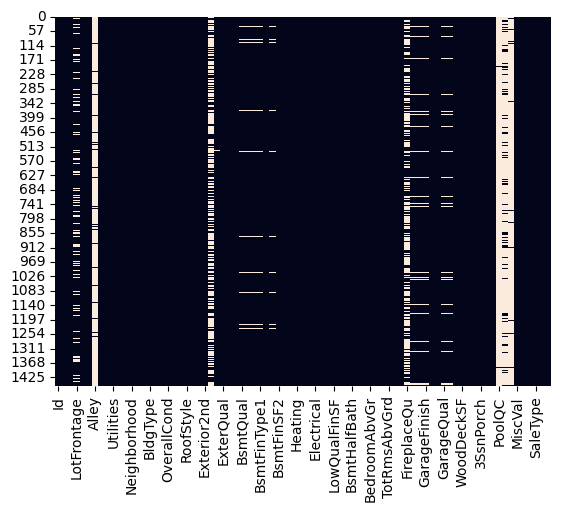

In [80]:
sns.heatmap(data.isnull(), cbar=False)
plt.show()

It is also helpful to compute the percentage of the values in our dataset that are missing.

We can do this by dividing the total number of missing cells by the total number of cells in the dataframe

Compute total number of cells in dataframe and cells with missing values

In [81]:
total_cells = np.product(data.shape)
total_missing = data.isnull().sum().sum()

Compute percentage

In [82]:
percentage_missing = total_missing / total_cells * 100
percentage_missing

6.620158971757145

### Dealing with missing value

There are mainly two ways to deal with missing data.
1. Drop the rows or columns which contains missing data
2. Replace missing data with substituted values also known as imputation.

Both methods have their own individula pros and cons. Which of the two methods you use will be highly dependent on your data as well as the nature of the problem you are trying to solve. If you are working on detailed piece of analysis, this is where you would take the time to really understand each column to figure out the best strategy to handle those missing values.

Generally speaking, dropping data is much easier and straightforward to implement but it does come at the expense of removing potentially useful information from our dataset. This will adversely affect model performance which then leads to inaccurate model predictions.

### Method 1

If you are in a hurry or don't have a reason to figure out why your values are missing, one option is to remove rows or columns that contain missing values. However, this is not the best approach in most cases because we might lose potentially useful information in our dataset.

Let's see how we can drop rows and columns with missing values using the `dropna` function.

Drop rows with missing values

In [83]:
data.dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


Yikes, it appears that we have all the rows in our dataframe. This is not good.

Ideally, we would only remove rows if we have a large number of training examples and if the rows with missing data is not a high number.
In our example, all the rows have at least one missing feature therefore dropping rows with missing data is not a good strategy to use.

Maybe we should remove columns with missing values instead.

In [84]:
col_with_na_dropped = data.dropna(axis = 1)
col_with_na_dropped.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


How much data did we lose?

In [85]:
print("Number of columns in original dataset: ", data.shape[1])
print("Number of columns left after dropping: ", col_with_na_dropped.shape[1])
difference = data.shape[1] - col_with_na_dropped.shape[1]
print("We have dropped a total of %d columns." %difference)

Number of columns in original dataset:  81
Number of columns left after dropping:  62
We have dropped a total of 19 columns.


We are dropping a substantial amount of features from our dataset, almost a quarter!

Features in our example are the characteristics that describe the house. If we remove features that are significant in explaining the sale price of the house, our model will not be able to make accurate predictions.

In an ideal scenario, it is only safe to drop a column if there is significant random missing data present in a column and if we have reasons to believe that the column is unimportant in predicting our target variable.

Let's have a closer look at the features that we are dropping.

In [86]:
col_with_na = data.columns[data.isnull().any()]
list(col_with_na)

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

To iterate, only drop rows and columns if you have significant amount missing data or that the data is not important in predicting the target variable.

Now let's look at a better approach for dealing with missing data via imputation.

### Method 2: Filling in missing values

There are a couple of ways to impute missing data that is subjective to the situation.

In this section, I will go through the two of the most common technique to fill missing data:
1. Using mean or median values (for numerical variables)
2. Using mode or zero (for categorical variables)

Numerical variables are continuous random variable like height, age, total sales whereas categorical variables are discrete random variables like yes or no, pass or fail, small, medium or large etc.

The main function to use here is the `fillna` function.

Suppose we want to fill missing data in the `LotFrontage` column

In [87]:
data['LotFrontage'].dtype

dtype('float64')

In [88]:
data['LotFrontage'].head(10)

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
5    85.0
6    75.0
7     NaN
8    51.0
9    50.0
Name: LotFrontage, dtype: float64

Row number 8 has missing value.

Suppose we want to fill all missing data in that column with the median.

Compute median

In [89]:
data['LotFrontage'].median()

69.0

Impute missing data in `LotFrontage` with median

In [90]:
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())
data['LotFrontage'].head(10)

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
5    85.0
6    75.0
7    69.0
8    51.0
9    50.0
Name: LotFrontage, dtype: float64

Row number 8 has been filled with the median of the `LotFrontage` columns that is 69

Now let's look at an example of a categorical variable like `GarageType`

Check data type of `GarageType` column

In [91]:
data['GarageType'].dtype

dtype('O')

Let's see the value counts in that column including the null value

In [92]:
data['GarageType'].value_counts(dropna=False)

GarageType
Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

The most frequent observation is `Attchd`

Suppose we want to fill the missing data with this observation.

In [93]:
data['GarageType'].mode(0)

0    Attchd
Name: GarageType, dtype: object

In [94]:
data['GarageType'].tail(10)

1450        NaN
1451     Attchd
1452    Basment
1453        NaN
1454     Attchd
1455     Attchd
1456     Attchd
1457     Attchd
1458     Attchd
1459     Attchd
Name: GarageType, dtype: object

In [95]:
data['GarageType'] = data['GarageType'].fillna(data['GarageType'].mode()[0])
data['GarageType'].tail(10)

1450     Attchd
1451     Attchd
1452    Basment
1453     Attchd
1454     Attchd
1455     Attchd
1456     Attchd
1457     Attchd
1458     Attchd
1459     Attchd
Name: GarageType, dtype: object

The missing values have now been replace with the mode.

We can also fill the missing data with any number or text that we like. Let's consider the `GarageQual` feature.  
Suppose we want to replace the null values with the work `Unknown`

In [96]:
data['GarageQual'] = data['GarageQual'].fillna('Unknown')
data['GarageQual'].value_counts(dropna = False)

GarageQual
TA         1311
Unknown      81
Fa           48
Gd           14
Ex            3
Po            3
Name: count, dtype: int64

Notice how the `NaN` has been replace with the word `Unknown`

There are the other more sophisticated methods of imputing missing data like using other features that are correlated to help determine the appropriate substitute value.  
However, I won't be covering those concepts, but if you are interested, you can check out this [article](https://medium.com/x8-the-ai-community/handling-missing-values-in-data-54e1dc77e24f)

## Module 6

### Combining dataframe

When working with multiple datasets during a project, there will come a point where you might wish to merge your dataframes together to have a better view and understanding of your data.

In this module, we will cover two Pandas functions, and they are `concat` and `merge` that are used to combine dataframes.

Note that you sometimes you will might see function like `join` and `append` being used in other people's notebooks.  
I will not be discussing these two function but just know they are the equivalent of `concat` and `merge` respectively.

I would recommend that you only learn `concat` and `merge` as they should be sufficient to handle all the scenarios that you will ever come across.

With that being said, let's proceed with the module.

### Concat

`concat` is short for concatenate. This function allows to stack two separate dataframes both vertically and horizontally.

Let's observe this with an example.

In [97]:
df1 = pd.DataFrame({'Name': ['Vicky', 'Bill'], 'Age': [12, 46]})
df2 = pd.DataFrame({'Name': ['John', 'Sabrina'], 'Age': [37, 25]})
df1

,Name,Age
0,Vicky,12
1,Bill,46


In [98]:
df2

,Name,Age
0,John,37
1,Sabrina,25


There is an argument called `axis` within the `concat` function that you can use to specify which way you would like to stack your dataframe.
`1` means horizontal whereas `0` means vertical. If you do not specify, Pandas assumes `0` as its default.

Concat horizontally.

In [99]:
pd.concat([df1, df2], axis=1)

,Name,Age,Name,Age
0,Vicky,12,John,37
1,Bill,46,Sabrina,25


Concat vertically and ignore index

In [100]:
df3 = pd.concat([df1, df2], axis=0)
df3

,Name,Age
0,Vicky,12
1,Bill,46
0,John,37
1,Sabrina,25


There is a another argument called `join` which allows you to stack dataframes only based on the columns shared by two dataframes.  
To demonstrate this, suppose we have a new dataframe with an extra column for hobby.

In [101]:
df4 = pd.DataFrame({'Name': ['Tyler', 'Natalie'], 'Age': [28, 39], 'Hobby': ['Swimming', 'Reading']})
df4

,Name,Age,Hobby
0,Tyler,28,Swimming
1,Natalie,39,Reading


Outer is the default for the `join` argument

In [102]:
pd.concat([df3, df4], join='outer', ignore_index=True)

,Name,Age,Hobby
0,Vicky,12,NaN
1,Bill,46,NaN
2,John,37,NaN
3,Sabrina,25,NaN
4,Tyler,28,Swimming
5,Natalie,39,Reading


Outer does not consider any differences in columns between two dataframe. Because `df3` does not have a `hobby` column, Pandas will automatically fill them with null values.  
`inner` stacks only the columns that are shared between the two dataframes.

In [103]:
pd.concat([df3, df4], join='inner', ignore_index=True)

,Name,Age
0,Vicky,12
1,Bill,46
2,John,37
3,Sabrina,25
4,Tyler,28
5,Natalie,39


Because `df3` does not have the `hobby` column, Pandas will not show that column in the combined dataframe.

### Merge

To demonstrate the idea of merge, let's first create two samples dataframe of a retail store.  
One for sales data and one for customer profile.

In [104]:
from datetime import date, timedelta

In [105]:
starting_date = date(2019, 7, 1)
ending_date = date(2020, 6, 30)
diff = ending_date - starting_date

In [106]:
dates = []

for k in range(diff.days + 1):
    dates.append(starting_date + timedelta(days = k))

lifestage = ['Young Adults', 'Family', 'Senior']
stores = [
    'Melbourne CBD', 'Carlton', 'Fitzroy', 'Collingwood', 
    'Richmond', 'Doncaster', 'Prahran', 'South Yarra', 
    'Docklands', 'Bundoora', 'Ivanhoe', 'Glen Waverly', 'Dandenong', 'Frankston'
]

Create two dataframes, one for sales and one for customer profile

In [107]:
import random
import datetime

sales = pd.DataFrame({
    'Date': random.choices(dates, k = 1000),
    'Customer ID': random.choices(list(range(1, 101)), k = 1000),
    'Store': random.choices(stores, k = 1000),
    'Sales': random.choices(list(range(1, 101)), k = 1000)
})

customers = pd.DataFrame({
    'Customer ID': list(range(1, 101)), 
    'Customer Lifestage': random.choices(lifestage, k = 100)
})

Let's look at sales

In [108]:
sales.head()

,Date,Customer ID,Store,Sales
0,2020-05-09,28,Glen Waverly,85
1,2020-02-06,93,Collingwood,26
2,2020-02-06,17,Bundoora,16
3,2019-08-22,25,Collingwood,79
4,2020-06-20,50,Prahran,31


Date is not in order, so let's sort data by date

In [109]:
sales.sort_values(by='Date', inplace=True, ignore_index=True)
sales.head()

,Date,Customer ID,Store,Sales
0,2019-07-01,63,Ivanhoe,95
1,2019-07-01,42,Glen Waverly,61
2,2019-07-01,6,Prahran,75
3,2019-07-01,54,Dandenong,93
4,2019-07-01,63,Glen Waverly,61


Shape of sales dataframe

In [110]:
sales.shape

(1000, 4)

Let's look at customers

In [111]:
customers.head()

,Customer ID,Customer Lifestage
0,1,Senior
1,2,Senior
2,3,Senior
3,4,Young Adults
4,5,Family


Shape of customers shape, there are 100 rows and 2 columns

In [112]:
customers.shape

(100, 2)

There are 100 unique customer ID which means that they are unique to each row

In [113]:
customers['Customer ID'].nunique()

100

Select sales made by customer with customer ID number 1

In [114]:
sales.loc[sales['Customer ID'] == 1, :].head()

,Date,Customer ID,Store,Sales
31,2019-07-12,1,Collingwood,7
35,2019-07-14,1,Carlton,34
97,2019-08-05,1,Docklands,98
163,2019-08-26,1,Dandenong,7
168,2019-08-29,1,Richmond,78


Merge the two dataframes together

In [115]:
combined = pd.merge(customers, sales)
combined.head()

,Customer ID,Customer Lifestage,Date,Store,Sales
0,1,Senior,2019-07-12,Collingwood,7
1,1,Senior,2019-07-14,Carlton,34
2,1,Senior,2019-08-05,Docklands,98
3,1,Senior,2019-08-26,Dandenong,7
4,1,Senior,2019-08-29,Richmond,78


In [116]:
print("Shape of sales data is: ", sales.shape)
print("Shape of customer data is: ", customers.shape)
print("Shape of the combined dataframe is: ", combined.shape)

Shape of sales data is:  (1000, 4)
Shape of customer data is:  (100, 2)
Shape of the combined dataframe is:  (1000, 5)


As we can see, merge has succesfully joined the two dataframes together based on a shared column which is `customer ID`.

The combined dataframe has the same number of rows as the sales dataframe but with an additional column, customer lifestage which came from the customer dataframe.

Now, we are going to explore the how argument within the `merge` function which allows to specify the direction in which you would like to merge your dataframes.

In [117]:
size = pd.DataFrame({'Colour': ['Red', 'Blue', 'Green'], 'Size': ['M', 'S', 'M']})
gender = pd.DataFrame({'Colour': ['Red', 'Blue', 'Yellow'], 'Sex': ['Female', 'Female', 'Male']})

size

,Colour,Size
0,Red,M
1,Blue,S
2,Green,M


In [118]:
gender

,Colour,Sex
0,Red,Female
1,Blue,Female
2,Yellow,Male


Inner and outer are very similar to what we have seen in the `concat` section earlier in this notebook

Only show rows where there is a match in the column  
Red and blue are present in both dataframes

In [119]:
pd.merge(size, gender, how='inner')

,Colour,Size,Sex
0,Red,M,Female
1,Blue,S,Female


Show all the rows and fill rows with null values when there is no match  
There is no sex info on green colour and there is no size info on yellow colour

In [120]:
pd.merge(size, gender, how='outer')

,Colour,Size,Sex
0,Blue,S,Female
1,Green,M,NaN
2,Red,M,Female
3,Yellow,NaN,Male


Left and right on the other hand allows you to specify which dataframe to keep when there is no matching rows

Keep everything that is on the right dataframe which is `df2` in this example
Fill in size info for rows that have matches with `df1` and if there is none e.g. yellow colour, fill null value

In [121]:
pd.merge(size, gender, how='right')

,Colour,Size,Sex
0,Red,M,Female
1,Blue,S,Female
2,Yellow,NaN,Male
